<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Lab_7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [17]:
from keras import layers
from keras import models
import pandas as pd

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 1s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 38s 49ms/step - loss: 0.4448 - accuracy: 0.8574 - val_loss: 0.0514 - val_accuracy: 0.9849
Epoch 2/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0521 - val_accuracy: 0.9847
Epoch 3/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 4/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0464 - val_accuracy: 0.9871
Epoch 5/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0406 - val_accuracy: 0.9895


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.0306 - accuracy: 0.9911


0.991100013256073

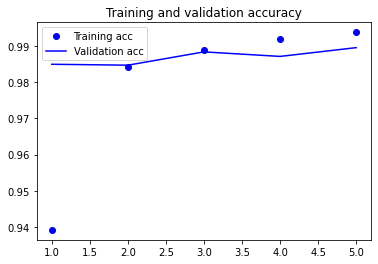

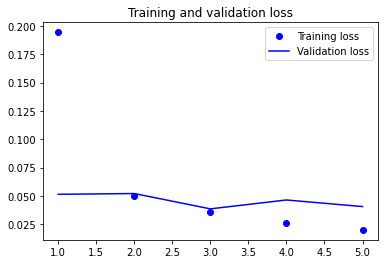

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Write code here
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam', activation='relu'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [10]:
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=1)

optimizer = ['RMSprop','Adam']
activation = ['relu', 'tanh']
param_grid = dict(optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(train_images, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed: 14.5min remaining: 72.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 14.7min finished


Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3103 - accuracy: 0.9006
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0319 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0190 - accuracy: 0.9941


In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.988283 using {'activation': 'relu', 'optimizer': 'RMSprop'}


In [12]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.988283 (0.000949) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.986050 (0.002423) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.985617 (0.002075) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.983483 (0.003487) with: {'activation': 'tanh', 'optimizer': 'Adam'}


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [14]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 20s 26ms/step - loss: 0.4494 - accuracy: 0.8558 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 2/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0425 - val_accuracy: 0.9876
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 4/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0414 - val_accuracy: 0.9891
Epoch 5/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0419 - val_accuracy: 0.9895
Epoch 6/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0452 - val_accuracy: 0.9887
Epoch 7/10
750/750 [==============================] - 21s 27ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0489 - val_accuracy:

In [18]:
history_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

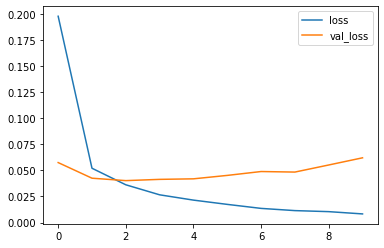

In [19]:
history_df[['loss','val_loss']].plot()

<AxesSubplot:>

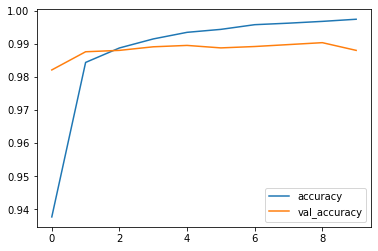

In [20]:
history_df[['accuracy','val_accuracy']].plot()